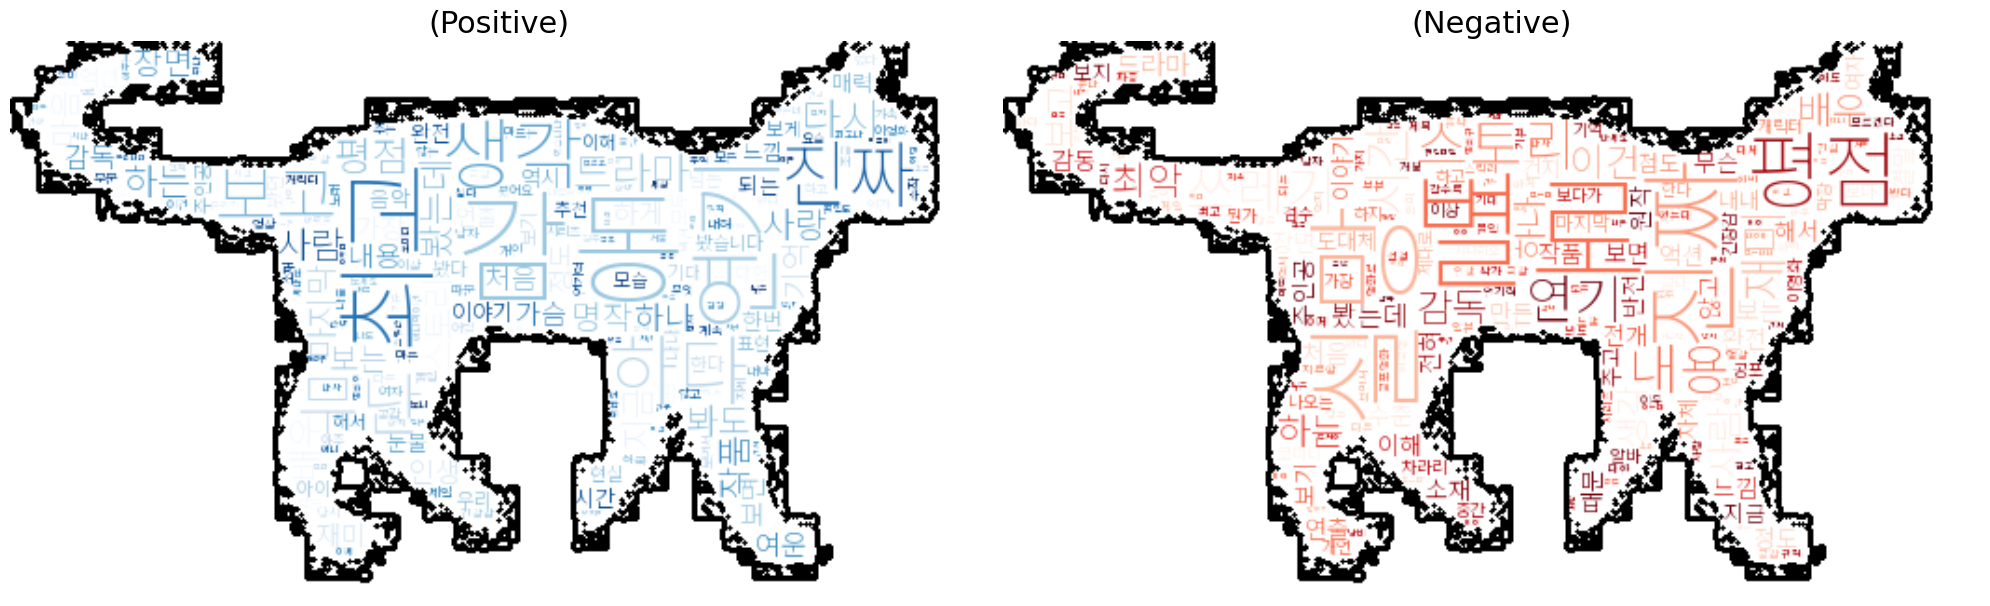

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import defaultdict
from PIL import Image
import matplotlib.font_manager as fm

# 파일 경로
csv_path = "C:/Users/HomePc/Desktop/review.csv"
mask_path = "C:/Users/HomePc/Desktop/aaa.jpg"  # 업로드한 마스크 파일명을 이렇게 저장했다고 가정
font_path = "C:/Windows/Fonts/NotoSansKR-VF.ttf"  # 다른 폰트 사용 예시

# 데이터 불러오기
df = pd.read_csv(csv_path)
df = df.dropna(subset=['review_text'])

# 긍정/부정 분리
pos_reviews = df[df['sentiment'] == 'Positive']
neg_reviews = df[df['sentiment'] == 'Negative']

# 형태소 분석기
okt = Okt()

# 단어 가중치 딕셔너리 생성 함수 (score 반영)
def get_weighted_words(reviews):
    word_weights = defaultdict(int)
    for _, row in reviews.iterrows():
        text = row['review_text']
        score = row['score']
        words = okt.nouns(text) + [word for word, tag in okt.pos(text) if tag == 'Verb']
        for word in words:
            if len(word) > 1 and word not in ['영화', '정말', '너무', '이런', '그냥', '합니다']:
                word_weights[word] += score  # 점수를 가중치로 사용
    return word_weights

# 워드클라우드 함수
def generate_wc(frequencies, color_map):
    mask = np.array(Image.open(mask_path))
    wc = WordCloud(
        font_path=font_path,
        background_color='white',
        mask=mask,
        width=1600,
        height=1600,
        colormap=color_map,
        contour_color='black',
        contour_width=1.5
    ).generate_from_frequencies(frequencies)
    return wc

# 가중치 반영 단어 추출
pos_words = get_weighted_words(pos_reviews)
neg_words = get_weighted_words(neg_reviews)

# 워드클라우드 생성
wc_pos = generate_wc(pos_words, 'Blues')
wc_neg = generate_wc(neg_words, 'Reds')

# 시각화
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title("(Positive)", fontsize=22)

plt.subplot(1, 2, 2)
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title("(Negative)", fontsize=22)

plt.tight_layout()
plt.show()
